# Project Aim
This project aims to find the most accurate method of predicting rental bike sharing's demand using the Bike Sharing Dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

# Business case

Rental services are paid, so as a rental service company, one of your concerns is customer satisfaction. Predicting bike rental demand helps adjust supply, especially if it can be done a few days in advance. The big problem with early prediction is that it converges to the task of predicting weather, a task which is notoriously difficult. That aside, making sure customers have a bike available when they need it ensures they are satisfied with the service and will therefore avoid any bad reviews and maintain reputation.

# Tools and Technologies used

The programming language used in this project is Python . The following libraries were used for data analysis and data visualization.

Pandas : For loading the dataset and performing data wrangling

Matplotlib: For data visualization.

Seaborn: For data visualization.

NumPy: For some math operations in predictions.

Statsmodels: For statistical computations

# Attribute Information: 

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week (Sun-0 to Sat-6)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Importing Standard libraries

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

* pandas - used to perform data manipulation and analysis

* numpy - used to perform a wide variety of mathematical operations on arrays

* matplotlib - used for data visualization and graphical plotting

* seaborn - built on top of matplotlib with similar functionalities

* %matplotlib - to enable the inline plotting.

* warnings - to manipulate warnings details 

* filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

* max-columns is to display all the features.

# Loading the Dataset

In [116]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 1. Inspecting the dataframe

In [117]:
# Check the summary for the numeric columns 
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [118]:
# Check the number of rows and columns in the dataframe
df.shape

(17379, 17)

# Initial Observations from data:-
The maximum number of bikes rented was 977

On Average people are renting 189 bikes throught the duration mentioned.

There are no null values present in the dataset.

In [119]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Let us check for NULL values in the dataset.

In [120]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [121]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [122]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2. Data Cleaning and Analysis

In [123]:
# We will change the following Int column into a categorical column.
cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [124]:
#The column 'instant' is very insignificant. Hence dropping that column.
df=df.drop('instant',axis=1)
df.shape

(17379, 16)

In [125]:
#dropping dteday
df=df.drop('dteday', axis=1)
df.shape

(17379, 15)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


# Visualization

# 2.1 Univariate Analysis

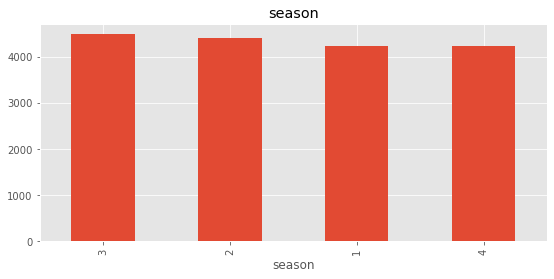

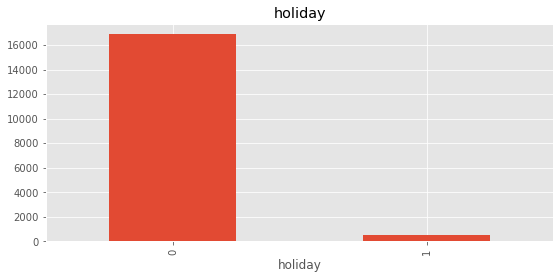

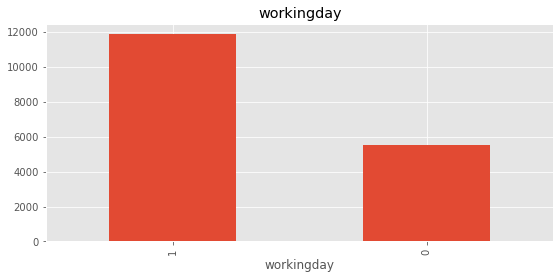

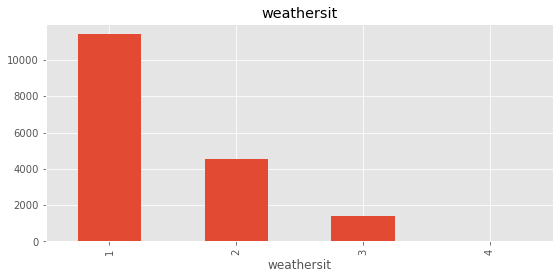

In [13]:
# Univariate analysis of few seemingly significant categorical variables:
univariate_categorical_cols=['season','holiday','workingday','weathersit']
plt.style.use('ggplot')
for column in univariate_categorical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [14]:
print('Number of holidays in 2011: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2012: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2011:  239
Number of holidays in 2012:  261


Inferences:

1. Even though the margin is minimum, the number of days in fall is maximum and winter is minimum. Number of days as per season in decreasing order: Fall, Summer, Spring, Winter.

2. The number of public holidays is 500 in 2 years. Number of holidays in 2011 and 2012 are 239 and 261 respectively

3. The number of non-working days(Public holidays+weekends) is slightly less than half the number of working days which can be favourable for bike renting for exploring different places during non working days but can be non-favourable as well since the daily commute to office during the working days can be hampered.

4. Weather situation is mostly Clear Day case scenario and Mist+Cloudy compared to Light Snow/Rain and Heavy Snow/Rain.

In [15]:
# Univariate analysis of few seemingly significant continuous variables:
univariate_numerical_cols=df.select_dtypes(include=np.number)
univariate_numerical_cols=list(univariate_numerical_cols)
univariate_numerical_cols
univariate_continuous_var=[i for i in univariate_numerical_cols if i not in ['yr',
 'mnth',
 'day',
 'holiday',
 'weekday',
 'workingday']]
univariate_continuous_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Histogram grid analysis

Assessing how our features are distributed to get an idea of each variable's meaning in the context of bike rentals and look for possible outliers.
Here we can assess what type of distribution each feature has (uniform, normal, exponential, etc.) and what variability we are dealing with.

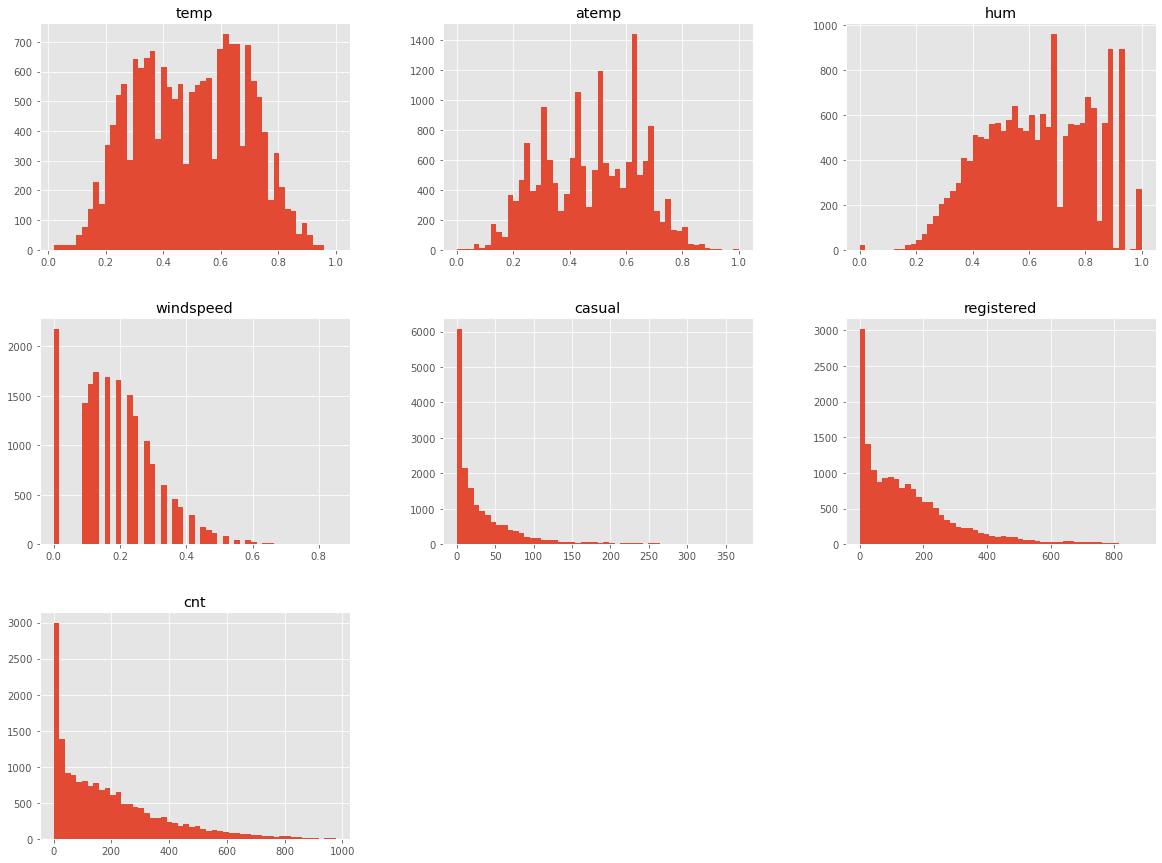

In [16]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Inferences:

1. Values of temperature and feeling temperature (atemp) are differently distributed.

2. Humidity is almost randomly distributed.

3. The KDE of windspeed is not a normal distribution but has  a right skew distribution.

4. The spread of casual users is not normally distributed, instead is right skewed also, that of registered users is right skew distribution ultimately leading to cnt to be right skewed.

# 2.2 Bivariate Analysis

In [17]:
# Let us explore the graph in terms of months.

[Text(0.5, 1.0, 'Count of bikes during different months')]

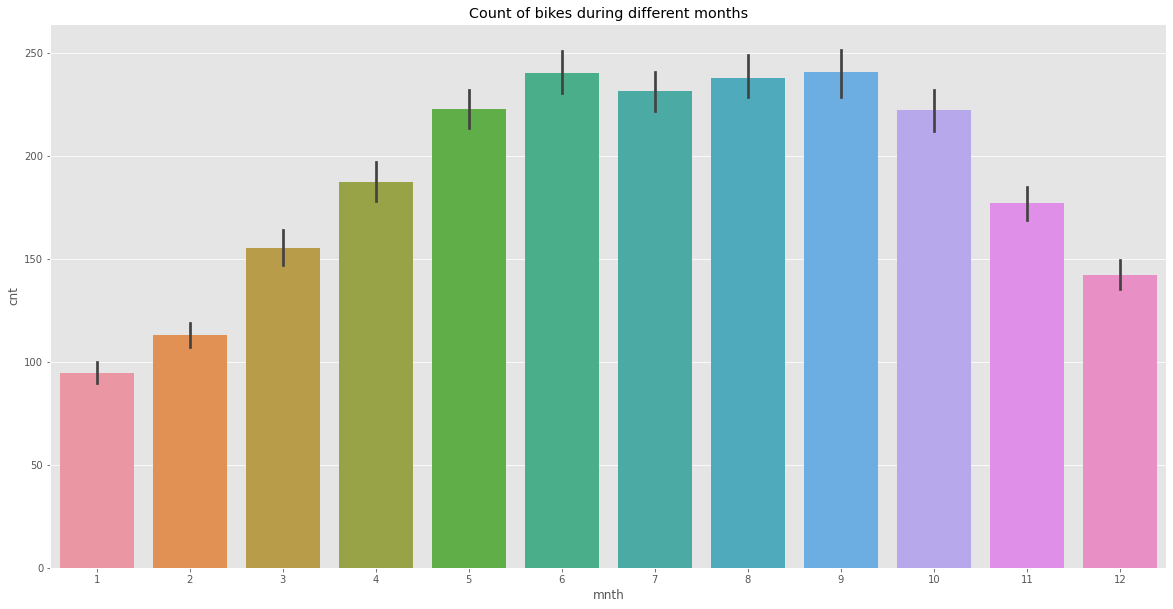

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

Over a period of time, the number of users increases and gradually, the number of users decreases.

In [19]:
# Let us explore the graph in terms of weekdays.

[Text(0.5, 1.0, 'Count of bikes during different days')]

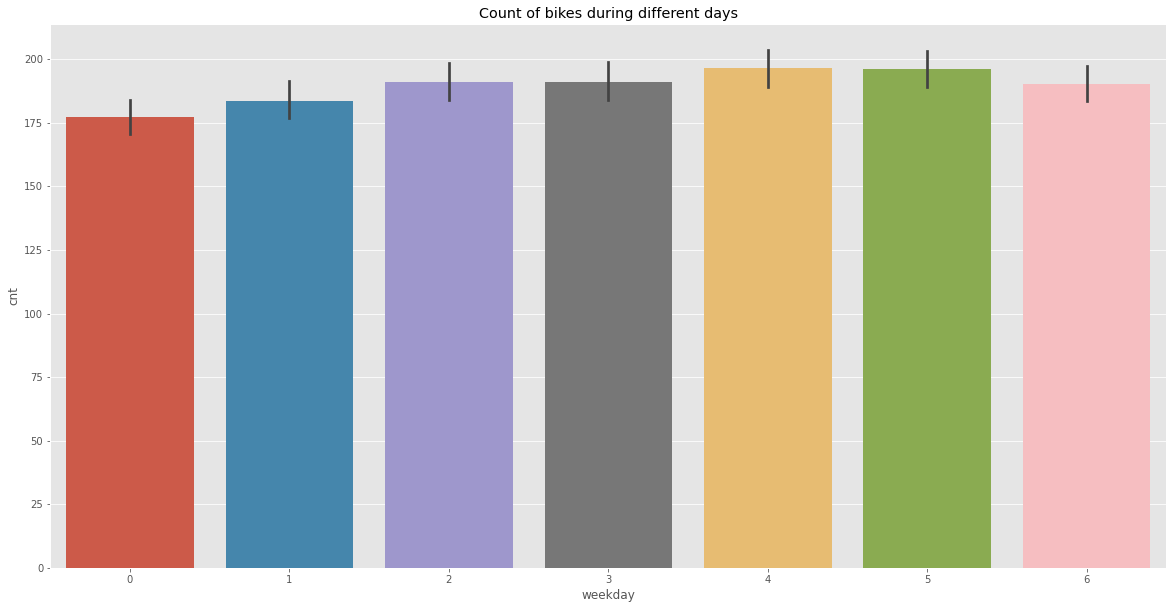

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

In this graph, we observe an average number of users throughout the week.

Thus, the average distribution is impractical for predictions

In [21]:
# Regression plot of temperature and humidity with respect to count.

[Text(0.5, 1.0, 'Relation between humidity and users')]

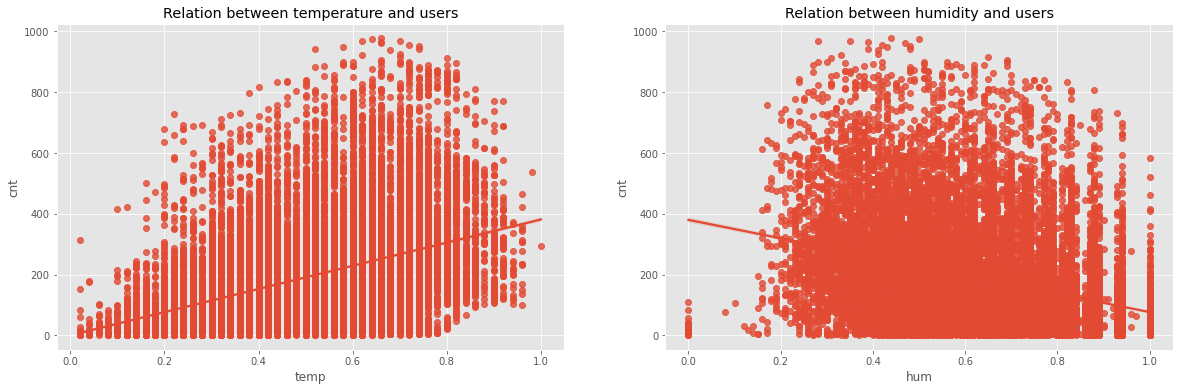

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

With the increase in temperature, the number of user increases.

When the humidity increases the number of users decreases.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


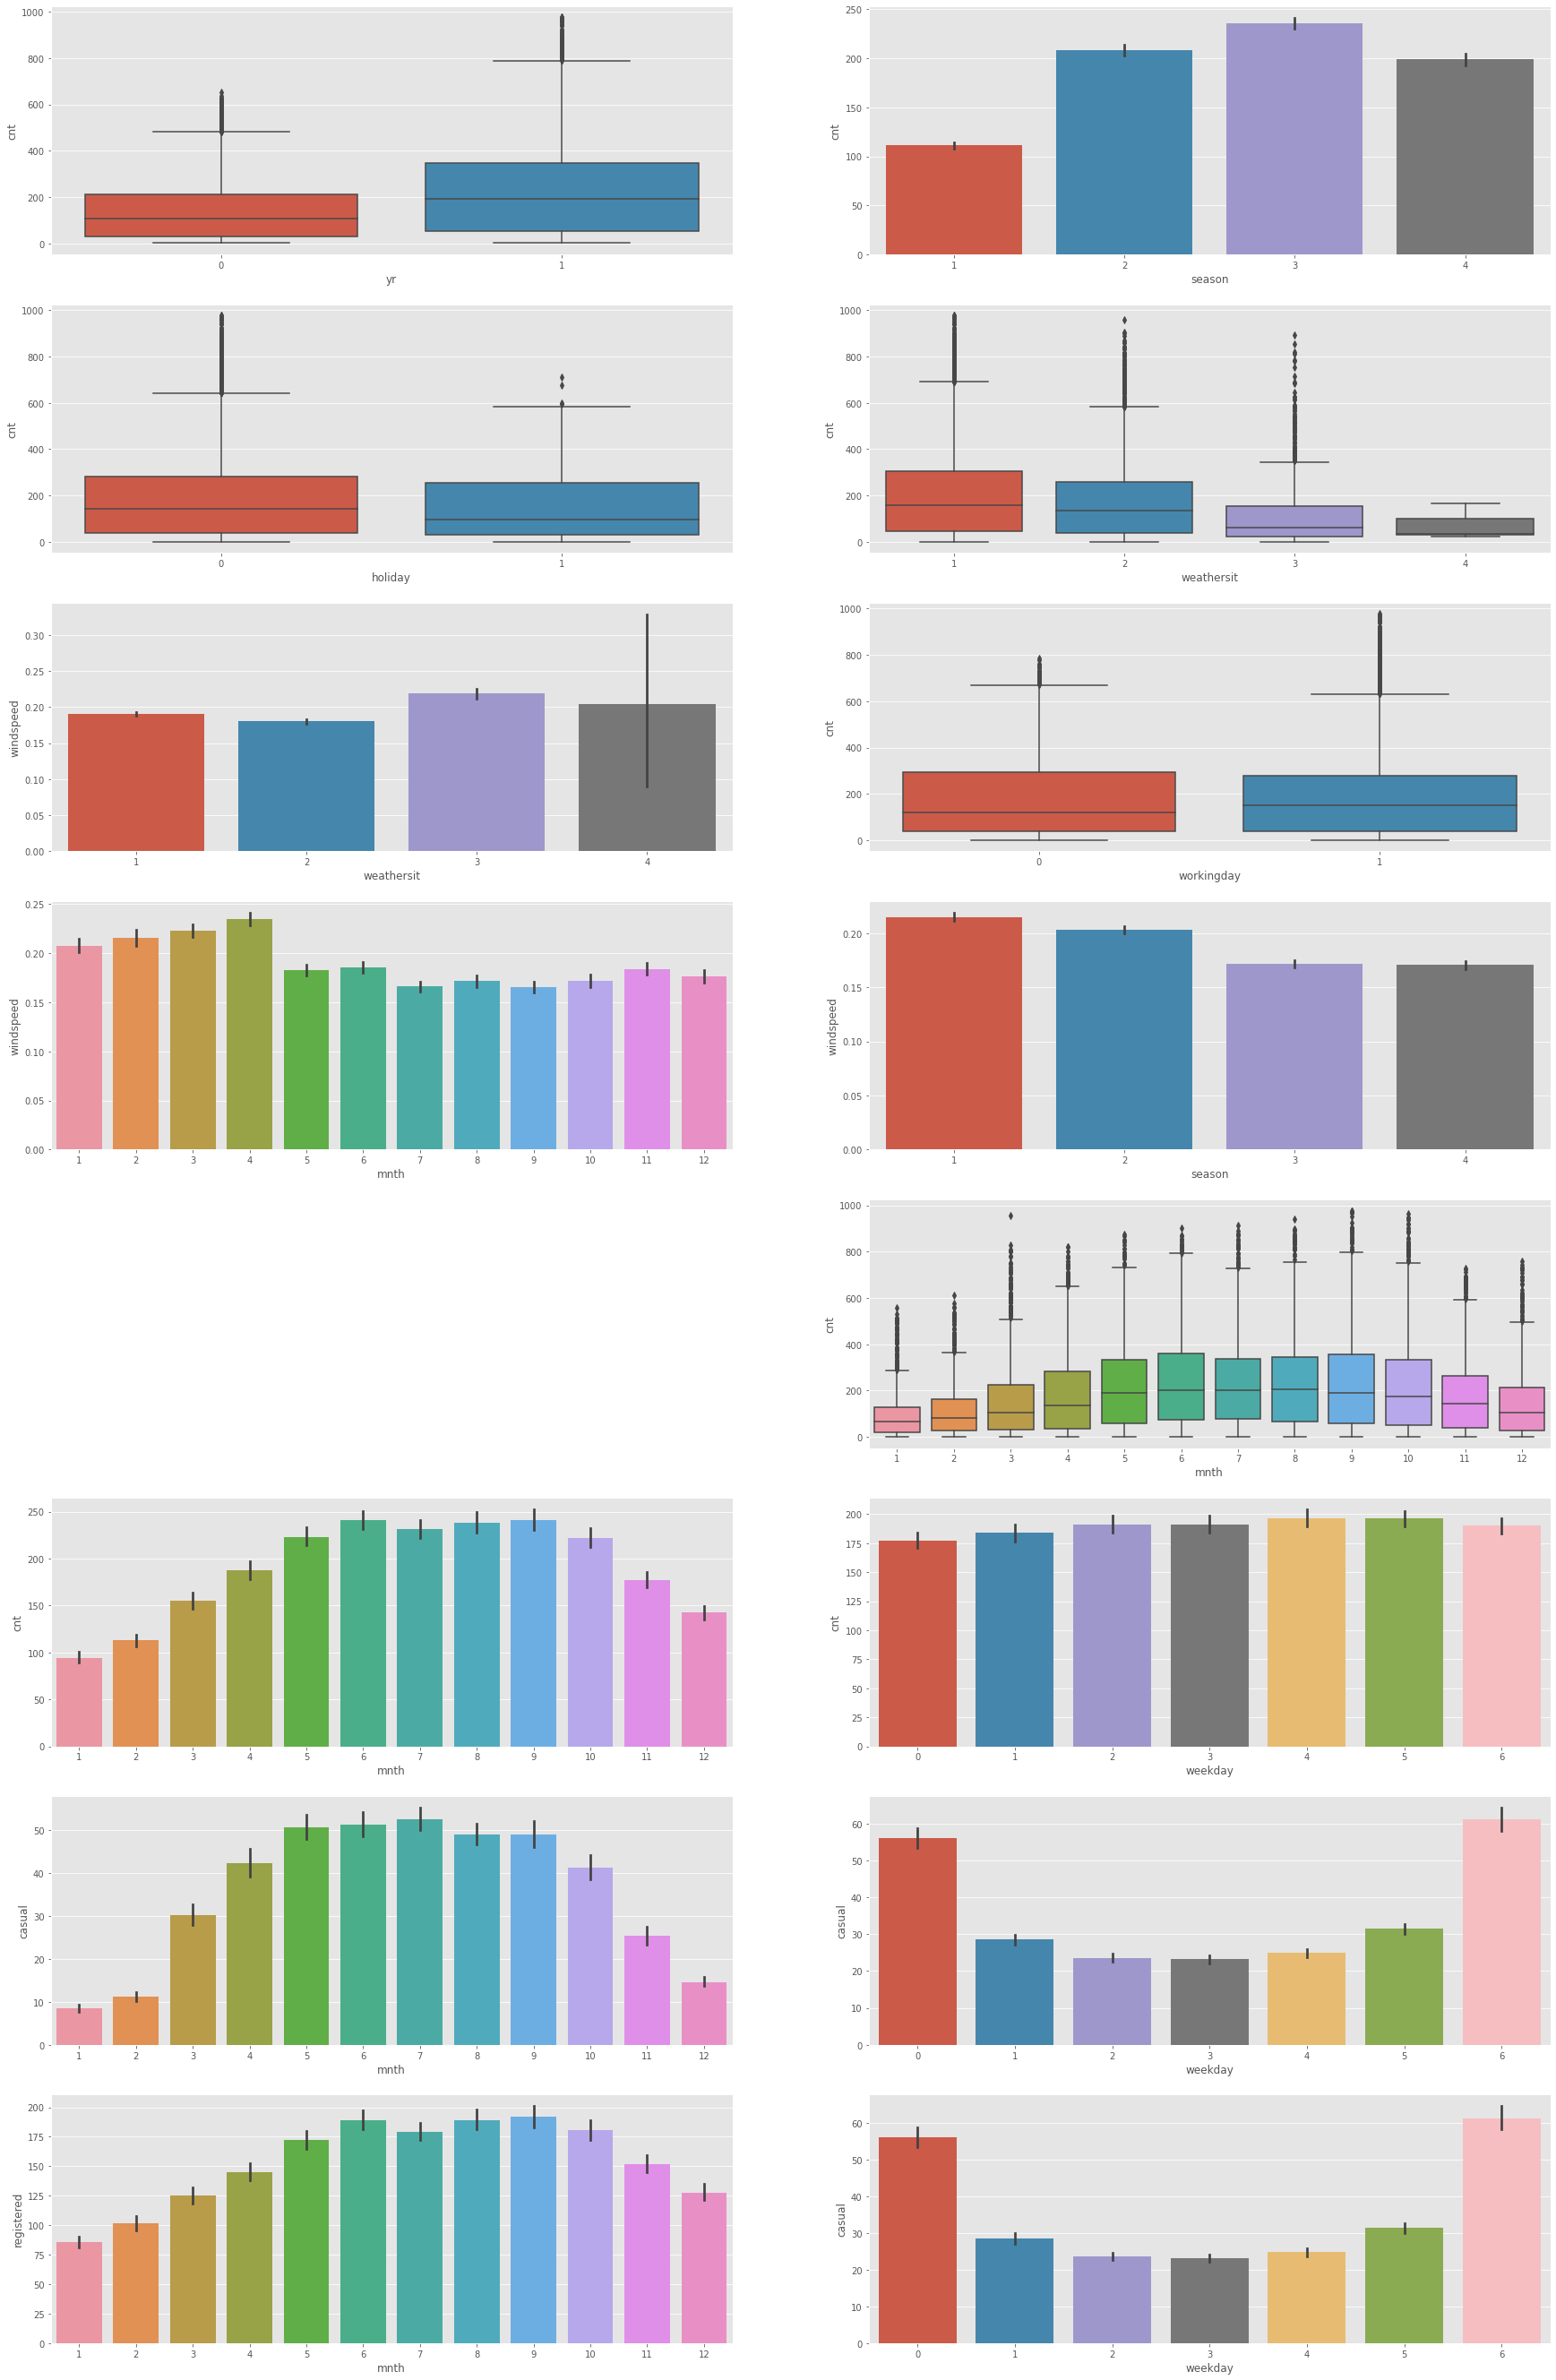

In [24]:
#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()

In [25]:
print('------------Winter Months-------------------------')
print('Months')
print(df[df['season']=='winter'].mnth.value_counts())
print('------------Spring Months-------------------------')
print('Months')
print(df[df['season']=='spring'].mnth.value_counts())
print('------------Summer Months-------------------------')
print('Months')
print(df[df['season']=='summer'].mnth.value_counts())
print('--------------Fall Months-------------------------')
print('Months')
print(df[df['season']=='fall'].mnth.value_counts())

------------Winter Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64
------------Spring Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64
------------Summer Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64
--------------Fall Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64


Inferences

1. The cnt in the year 2012 was way more than that in 2011. 

2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.

3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.

4. Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week.

5. The average count of bikes rented when the weather is situation is 'Clear' or 'Mist + Cloudy' is much more compared to other situations - Wind speed during the bad weather situations (light snow/rain and heavy snow/rain) is more than 'Clear' and 'Mist + Cloudy' weather situations and hence more number of bikes are rented in such situations.

6. There was a drop of bike rents by casual users in the winters and in the first 2 months of spring and less drop in the registered users. These people may be regular office going people or fitness enthusiasts.

Also, by looking at a sample of the dataset it seems like column casual + registered = count

Now we'll test wether casual + registered equals count or not.

In [127]:
test_count = df['casual'] + df['registered'] == df['cnt']
assert test_count.sum() == len(test_count)

there is no assertion error. Hence proved that casual + registered = cnt

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [128]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [129]:
df_new=df.copy()

In [130]:
df_new = df_new[['yr','season','mnth','hr','weekday','weathersit','holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']]
df_new.head()

,yr,season,mnth,hr,weekday,weathersit,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,1,0,6,1,0,0,0.24,0.2879,0.81,0.0,3,13,16
1,0,1,1,1,6,1,0,0,0.22,0.2727,0.80,0.0,8,32,40
2,0,1,1,2,6,1,0,0,0.22,0.2727,0.80,0.0,5,27,32
3,0,1,1,3,6,1,0,0,0.24,0.2879,0.75,0.0,3,10,13
4,0,1,1,4,6,1,0,0,0.24,0.2879,0.75,0.0,0,1,1


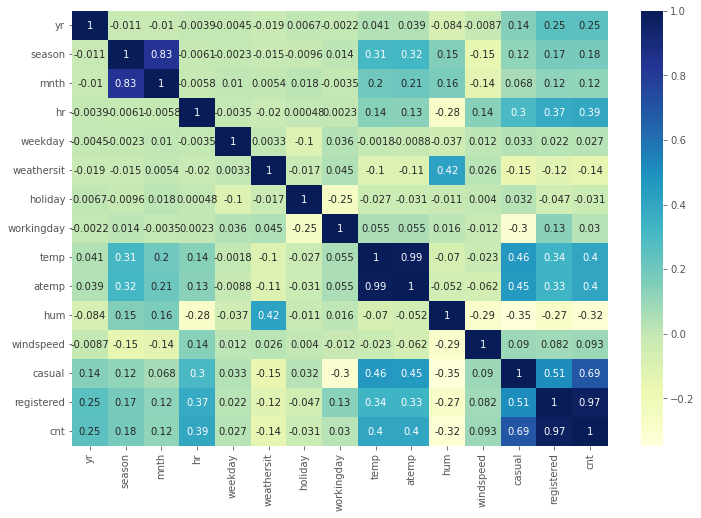

In [131]:
#Checking the colinearlity amongst the variables
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")
plt.show()

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them from original dataframe df since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [132]:
df=df.drop(['casual', 'registered'],axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Also temp and atemp are very highly corelated and their respective colinearities with cnt are also same. Hence dropping atemp since feeling temperature can be relatively less accurate compared to temperature.

In [133]:
df=df.drop('atemp',axis=1)

In [134]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [135]:
# Initiating Train test split 

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [138]:
# Data Transformation

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_columns = ["temp", "hum","windspeed"]
categorical_columns = ["season","yr","mnth","hr","weekday","holiday","workingday","weathersit"]
num_pipeline= Pipeline(steps=[("scaler",StandardScaler())])
cat_pipeline=Pipeline(steps=[
            ("one_hot_encoder",OneHotEncoder(handle_unknown = 'error',drop='first',sparse=False)),
            ("scaler",StandardScaler(with_mean=False))
            ])


preprocessor=ColumnTransformer(
            [
            ("num_pipeline",num_pipeline,numerical_columns),
            ("cat_pipelines",cat_pipeline,categorical_columns)

            ],remainder="passthrough"
        )

In [140]:
target_column_name="cnt"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]  

input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

In [141]:
# Applying preprocessing object on training dataframe and testing dataframe

In [142]:
input_feature_train_arr=preprocessor.fit_transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

In [143]:
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

In [144]:
def save_object(file_path, obj):
    dir_path = os.path.dirname(file_path)

    os.makedirs(dir_path, exist_ok=True)

    with open(file_path, "wb") as file_obj:
        pickle.dump(obj, file_obj)

In [145]:
import os
import pickle
class DataTransformationConfig():
    preprocessor_obj_file_path=os.path.join('artifacts',"preprocessor.pkl")

In [146]:
save_object(

    file_path=DataTransformationConfig().preprocessor_obj_file_path,
    obj=preprocessor

)

In [147]:
trained_model_file_path=os.path.join("artifacts","model.pkl")

In [148]:
# Split training and test input data

In [149]:
X_train,y_train,X_test,y_test=(
    train_arr[:,:-1],
    train_arr[:,-1],
    test_arr[:,:-1],
    test_arr[:,-1]
)

In [150]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [151]:
from catboost import CatBoostRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor



models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "KNeighbor Regressor": KNeighborsRegressor(),
    "Support Vector Regressor":SVR(),
    "Bagging Regressor": BaggingRegressor()
}

In [152]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Root Mean Squared Error: 19.7181
- Mean Absolute Error: 12.3541
- R2 Score: 0.9883
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 51.4956
- Mean Absolute Error: 32.1147
- R2 Score: 0.9163


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.5989
- Mean Absolute Error: 0.0150
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 72.4063
- Mean Absolute Error: 43.5491
- R2 Score: 0.8344


Gradient Boosting
Model performance for Training set
- Root Mean Squared Error: 80.4676
- Mean Absolute Error: 58.1210
- R2 Score: 0.8050
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 79.4903
- Mean Absolute Error: 57.4594
- R2 Score: 0.8005


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 101.9672
- Mean Absolute Error: 75.5558
- R2 Score: 0.686

# Results

In [153]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,CatBoosting Regressor,0.933583
0,Random Forest,0.916256
8,Bagging Regressor,0.907949
1,Decision Tree,0.834435
2,Gradient Boosting,0.800454
6,KNeighbor Regressor,0.776958
3,Linear Regression,0.681021
7,Support Vector Regressor,0.435269
5,AdaBoost Regressor,0.384729


In [154]:
# So, the best performing model is CatBoostRegressor.
# Let us train it separately again from start and see its details

# CatBoostRegressor

In [155]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.062057
0:	learn: 176.8603671	total: 4.52ms	remaining: 4.51s
1:	learn: 172.0077548	total: 8.42ms	remaining: 4.2s
2:	learn: 167.3174578	total: 12.8ms	remaining: 4.26s
3:	learn: 163.1887471	total: 16.8ms	remaining: 4.18s
4:	learn: 159.5064300	total: 20.6ms	remaining: 4.1s
5:	learn: 156.1826199	total: 24.6ms	remaining: 4.08s
6:	learn: 152.9960203	total: 28.7ms	remaining: 4.07s
7:	learn: 149.9368844	total: 32.8ms	remaining: 4.07s
8:	learn: 147.4010881	total: 36.7ms	remaining: 4.04s
9:	learn: 145.0858940	total: 40.5ms	remaining: 4.01s
10:	learn: 142.7094061	total: 44.7ms	remaining: 4.02s
11:	learn: 140.5450713	total: 49.2ms	remaining: 4.05s
12:	learn: 138.0077895	total: 53.3ms	remaining: 4.05s
13:	learn: 136.0427930	total: 57.2ms	remaining: 4.03s
14:	learn: 134.0324410	total: 61.2ms	remaining: 4.01s
15:	learn: 132.3411142	total: 64.9ms	remaining: 3.99s
16:	learn: 130.4302966	total: 68.6ms	remaining: 3.97s
17:	learn: 128.9876943	total: 72.5ms	remaining: 3.96s
18:	learn:

190:	learn: 60.4999557	total: 861ms	remaining: 3.65s
191:	learn: 60.4027295	total: 866ms	remaining: 3.64s
192:	learn: 60.3112239	total: 871ms	remaining: 3.64s
193:	learn: 60.2175837	total: 876ms	remaining: 3.64s
194:	learn: 60.1417649	total: 880ms	remaining: 3.63s
195:	learn: 60.0510872	total: 885ms	remaining: 3.63s
196:	learn: 59.9603197	total: 889ms	remaining: 3.63s
197:	learn: 59.8713841	total: 895ms	remaining: 3.62s
198:	learn: 59.7701515	total: 901ms	remaining: 3.63s
199:	learn: 59.6792041	total: 907ms	remaining: 3.63s
200:	learn: 59.5961664	total: 913ms	remaining: 3.63s
201:	learn: 59.5068130	total: 917ms	remaining: 3.62s
202:	learn: 59.4306439	total: 921ms	remaining: 3.62s
203:	learn: 59.3420027	total: 925ms	remaining: 3.61s
204:	learn: 59.2466741	total: 929ms	remaining: 3.6s
205:	learn: 59.1772068	total: 933ms	remaining: 3.6s
206:	learn: 59.0998650	total: 936ms	remaining: 3.59s
207:	learn: 59.0306465	total: 940ms	remaining: 3.58s
208:	learn: 58.9473539	total: 944ms	remaining: 3

377:	learn: 50.5113314	total: 1.74s	remaining: 2.86s
378:	learn: 50.4759624	total: 1.74s	remaining: 2.85s
379:	learn: 50.4435793	total: 1.74s	remaining: 2.85s
380:	learn: 50.4068263	total: 1.75s	remaining: 2.84s
381:	learn: 50.3685852	total: 1.75s	remaining: 2.84s
382:	learn: 50.3377572	total: 1.76s	remaining: 2.83s
383:	learn: 50.3032942	total: 1.76s	remaining: 2.83s
384:	learn: 50.2711113	total: 1.77s	remaining: 2.83s
385:	learn: 50.2398700	total: 1.77s	remaining: 2.82s
386:	learn: 50.2107874	total: 1.78s	remaining: 2.82s
387:	learn: 50.1846368	total: 1.78s	remaining: 2.81s
388:	learn: 50.1516434	total: 1.79s	remaining: 2.81s
389:	learn: 50.1200597	total: 1.79s	remaining: 2.8s
390:	learn: 50.0864387	total: 1.8s	remaining: 2.8s
391:	learn: 50.0511793	total: 1.8s	remaining: 2.79s
392:	learn: 50.0166399	total: 1.8s	remaining: 2.79s
393:	learn: 49.9879322	total: 1.81s	remaining: 2.78s
394:	learn: 49.9666544	total: 1.81s	remaining: 2.78s
395:	learn: 49.9199695	total: 1.82s	remaining: 2.77

572:	learn: 45.5363441	total: 2.6s	remaining: 1.94s
573:	learn: 45.5161618	total: 2.61s	remaining: 1.94s
574:	learn: 45.4939509	total: 2.61s	remaining: 1.93s
575:	learn: 45.4736148	total: 2.62s	remaining: 1.93s
576:	learn: 45.4562379	total: 2.62s	remaining: 1.92s
577:	learn: 45.4455515	total: 2.63s	remaining: 1.92s
578:	learn: 45.4248177	total: 2.63s	remaining: 1.91s
579:	learn: 45.4056565	total: 2.64s	remaining: 1.91s
580:	learn: 45.3694938	total: 2.64s	remaining: 1.91s
581:	learn: 45.3527705	total: 2.65s	remaining: 1.9s
582:	learn: 45.3308193	total: 2.65s	remaining: 1.9s
583:	learn: 45.3135934	total: 2.65s	remaining: 1.89s
584:	learn: 45.2959848	total: 2.66s	remaining: 1.88s
585:	learn: 45.2736722	total: 2.66s	remaining: 1.88s
586:	learn: 45.2631894	total: 2.66s	remaining: 1.87s
587:	learn: 45.2483601	total: 2.67s	remaining: 1.87s
588:	learn: 45.2275370	total: 2.67s	remaining: 1.86s
589:	learn: 45.2136203	total: 2.68s	remaining: 1.86s
590:	learn: 45.1858896	total: 2.68s	remaining: 1.

742:	learn: 42.5662314	total: 3.29s	remaining: 1.14s
743:	learn: 42.5561033	total: 3.3s	remaining: 1.14s
744:	learn: 42.5382255	total: 3.31s	remaining: 1.13s
745:	learn: 42.5228902	total: 3.31s	remaining: 1.13s
746:	learn: 42.5062970	total: 3.31s	remaining: 1.12s
747:	learn: 42.4928025	total: 3.32s	remaining: 1.12s
748:	learn: 42.4737335	total: 3.33s	remaining: 1.11s
749:	learn: 42.4657260	total: 3.33s	remaining: 1.11s
750:	learn: 42.4508674	total: 3.33s	remaining: 1.1s
751:	learn: 42.4396117	total: 3.34s	remaining: 1.1s
752:	learn: 42.4287419	total: 3.34s	remaining: 1.1s
753:	learn: 42.4131634	total: 3.35s	remaining: 1.09s
754:	learn: 42.3982295	total: 3.35s	remaining: 1.09s
755:	learn: 42.3879015	total: 3.35s	remaining: 1.08s
756:	learn: 42.3764870	total: 3.36s	remaining: 1.08s
757:	learn: 42.3556822	total: 3.36s	remaining: 1.07s
758:	learn: 42.3464424	total: 3.37s	remaining: 1.07s
759:	learn: 42.3330326	total: 3.37s	remaining: 1.06s
760:	learn: 42.3216639	total: 3.38s	remaining: 1.0

912:	learn: 40.3175984	total: 4s	remaining: 381ms
913:	learn: 40.3068806	total: 4s	remaining: 377ms
914:	learn: 40.2980652	total: 4.01s	remaining: 372ms
915:	learn: 40.2841158	total: 4.01s	remaining: 368ms
916:	learn: 40.2755348	total: 4.02s	remaining: 364ms
917:	learn: 40.2642806	total: 4.02s	remaining: 359ms
918:	learn: 40.2493448	total: 4.03s	remaining: 355ms
919:	learn: 40.2348247	total: 4.03s	remaining: 351ms
920:	learn: 40.2248524	total: 4.04s	remaining: 346ms
921:	learn: 40.2080162	total: 4.04s	remaining: 342ms
922:	learn: 40.1944495	total: 4.05s	remaining: 338ms
923:	learn: 40.1802594	total: 4.05s	remaining: 334ms
924:	learn: 40.1704375	total: 4.06s	remaining: 329ms
925:	learn: 40.1558539	total: 4.06s	remaining: 325ms
926:	learn: 40.1442697	total: 4.07s	remaining: 320ms
927:	learn: 40.1325753	total: 4.07s	remaining: 316ms
928:	learn: 40.1190636	total: 4.08s	remaining: 312ms
929:	learn: 40.1106241	total: 4.08s	remaining: 307ms
930:	learn: 40.1008332	total: 4.08s	remaining: 303ms

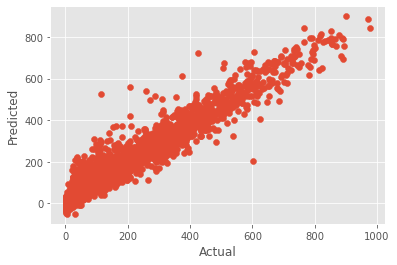

In [156]:
# Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [157]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,425.0,419.496733,5.503267
1,88.0,79.223630,8.776370
2,4.0,18.422148,-14.422148
3,526.0,522.322019,3.677981
4,13.0,35.826690,-22.826690
...,...,...,...
3471,17.0,8.944749,8.055251
3472,85.0,42.239808,42.760192
3473,98.0,86.172254,11.827746
3474,266.0,314.720261,-48.720261


In [158]:
save_object(
    trained_model_file_path,
    catboost_model 
)

In [159]:
y_pred=catboost_model.predict(X_test)

r2_square = r2_score(y_test, y_pred)
r2_square

0.9335830846456539

# Hyperparameter Tuning for all models

In [160]:
# Gridseach is done on the training set, during training it should not see the test set bcoz we don't want to tune our... 
# hyperparameters based on the test set

# Hyperparameter Tuning for Cat Boosting Regression model

In [161]:
CBR_parameters={
        "iterations": [1000],
        "learning_rate": [1e-3, 0.1],
        "depth": [1, 10],
        "subsample": [0.05, 1.0],
        "colsample_bylevel": [0.05, 1.0],
        "min_data_in_leaf": [1, 100]    
    
}

In [162]:
from sklearn.model_selection import GridSearchCV

cbr_tuning_model=GridSearchCV(estimator=CatBoostRegressor(),
                                   param_grid=CBR_parameters,cv=3,n_jobs=-1)

In [163]:
from datetime import datetime
cbr_tuning_model.fit(X_train,y_train)

0:	learn: 171.6584838	total: 13.2ms	remaining: 13.2s
1:	learn: 162.1758613	total: 24.9ms	remaining: 12.4s
2:	learn: 154.9827460	total: 36ms	remaining: 12s
3:	learn: 146.6075983	total: 46.9ms	remaining: 11.7s
4:	learn: 139.9136584	total: 57.9ms	remaining: 11.5s
5:	learn: 133.7464441	total: 68.8ms	remaining: 11.4s
6:	learn: 128.1181407	total: 79.8ms	remaining: 11.3s
7:	learn: 123.2195813	total: 91ms	remaining: 11.3s
8:	learn: 118.4904459	total: 101ms	remaining: 11.1s
9:	learn: 114.8803991	total: 112ms	remaining: 11.1s
10:	learn: 111.0270862	total: 123ms	remaining: 11s
11:	learn: 107.2060081	total: 134ms	remaining: 11s
12:	learn: 103.6600806	total: 145ms	remaining: 11s
13:	learn: 100.1090597	total: 156ms	remaining: 11s
14:	learn: 97.4381143	total: 167ms	remaining: 10.9s
15:	learn: 95.3200252	total: 177ms	remaining: 10.9s
16:	learn: 92.7093134	total: 189ms	remaining: 10.9s
17:	learn: 90.5662286	total: 200ms	remaining: 10.9s
18:	learn: 89.0097055	total: 212ms	remaining: 11s
19:	learn: 87.47

167:	learn: 41.3749753	total: 1.97s	remaining: 9.74s
168:	learn: 41.2643655	total: 1.98s	remaining: 9.72s
169:	learn: 41.1930305	total: 1.99s	remaining: 9.71s
170:	learn: 41.1127645	total: 2s	remaining: 9.69s
171:	learn: 41.0326118	total: 2.01s	remaining: 9.68s
172:	learn: 40.9605613	total: 2.02s	remaining: 9.66s
173:	learn: 40.8866312	total: 2.03s	remaining: 9.65s
174:	learn: 40.8100036	total: 2.04s	remaining: 9.64s
175:	learn: 40.7311996	total: 2.06s	remaining: 9.63s
176:	learn: 40.6427916	total: 2.07s	remaining: 9.61s
177:	learn: 40.5637530	total: 2.08s	remaining: 9.6s
178:	learn: 40.4877572	total: 2.09s	remaining: 9.59s
179:	learn: 40.4161252	total: 2.1s	remaining: 9.57s
180:	learn: 40.3514342	total: 2.11s	remaining: 9.56s
181:	learn: 40.2826661	total: 2.12s	remaining: 9.54s
182:	learn: 40.2191470	total: 2.13s	remaining: 9.53s
183:	learn: 40.1131148	total: 2.15s	remaining: 9.52s
184:	learn: 40.0495073	total: 2.16s	remaining: 9.5s
185:	learn: 39.9823459	total: 2.17s	remaining: 9.49s

335:	learn: 31.9342805	total: 3.91s	remaining: 7.72s
336:	learn: 31.9064292	total: 3.92s	remaining: 7.71s
337:	learn: 31.8745322	total: 3.93s	remaining: 7.71s
338:	learn: 31.8287560	total: 3.95s	remaining: 7.7s
339:	learn: 31.7971611	total: 3.96s	remaining: 7.68s
340:	learn: 31.7554035	total: 3.97s	remaining: 7.67s
341:	learn: 31.7133525	total: 3.98s	remaining: 7.66s
342:	learn: 31.6788627	total: 3.99s	remaining: 7.65s
343:	learn: 31.6364416	total: 4s	remaining: 7.63s
344:	learn: 31.5958092	total: 4.01s	remaining: 7.62s
345:	learn: 31.5661546	total: 4.03s	remaining: 7.61s
346:	learn: 31.5427907	total: 4.04s	remaining: 7.6s
347:	learn: 31.5156304	total: 4.05s	remaining: 7.59s
348:	learn: 31.4730886	total: 4.06s	remaining: 7.57s
349:	learn: 31.4427950	total: 4.07s	remaining: 7.56s
350:	learn: 31.4190258	total: 4.08s	remaining: 7.55s
351:	learn: 31.3890075	total: 4.09s	remaining: 7.54s
352:	learn: 31.3557675	total: 4.11s	remaining: 7.53s
353:	learn: 31.3185005	total: 4.12s	remaining: 7.52

499:	learn: 27.8884487	total: 5.8s	remaining: 5.8s
500:	learn: 27.8763192	total: 5.82s	remaining: 5.79s
501:	learn: 27.8645900	total: 5.83s	remaining: 5.78s
502:	learn: 27.8361609	total: 5.84s	remaining: 5.77s
503:	learn: 27.8245798	total: 5.85s	remaining: 5.76s
504:	learn: 27.7967967	total: 5.87s	remaining: 5.75s
505:	learn: 27.7676905	total: 5.88s	remaining: 5.74s
506:	learn: 27.7276445	total: 5.89s	remaining: 5.73s
507:	learn: 27.7160066	total: 5.9s	remaining: 5.71s
508:	learn: 27.6895117	total: 5.91s	remaining: 5.7s
509:	learn: 27.6765589	total: 5.92s	remaining: 5.69s
510:	learn: 27.6546409	total: 5.93s	remaining: 5.68s
511:	learn: 27.6398890	total: 5.94s	remaining: 5.66s
512:	learn: 27.6185785	total: 5.95s	remaining: 5.65s
513:	learn: 27.6056568	total: 5.96s	remaining: 5.64s
514:	learn: 27.5893023	total: 5.98s	remaining: 5.63s
515:	learn: 27.5765357	total: 5.99s	remaining: 5.62s
516:	learn: 27.5470152	total: 6s	remaining: 5.6s
517:	learn: 27.5357131	total: 6.01s	remaining: 5.59s
5

666:	learn: 24.8822463	total: 7.72s	remaining: 3.85s
667:	learn: 24.8568643	total: 7.73s	remaining: 3.84s
668:	learn: 24.8472620	total: 7.75s	remaining: 3.83s
669:	learn: 24.8381875	total: 7.76s	remaining: 3.82s
670:	learn: 24.8137351	total: 7.77s	remaining: 3.81s
671:	learn: 24.8035195	total: 7.78s	remaining: 3.8s
672:	learn: 24.7885910	total: 7.79s	remaining: 3.79s
673:	learn: 24.7618497	total: 7.8s	remaining: 3.77s
674:	learn: 24.7423781	total: 7.81s	remaining: 3.76s
675:	learn: 24.7346340	total: 7.82s	remaining: 3.75s
676:	learn: 24.7189149	total: 7.83s	remaining: 3.74s
677:	learn: 24.7102692	total: 7.85s	remaining: 3.73s
678:	learn: 24.6931513	total: 7.86s	remaining: 3.71s
679:	learn: 24.6797026	total: 7.87s	remaining: 3.7s
680:	learn: 24.6671697	total: 7.88s	remaining: 3.69s
681:	learn: 24.6448855	total: 7.89s	remaining: 3.68s
682:	learn: 24.6335894	total: 7.9s	remaining: 3.67s
683:	learn: 24.6255248	total: 7.91s	remaining: 3.65s
684:	learn: 24.6070679	total: 7.92s	remaining: 3.6

835:	learn: 22.3895802	total: 9.67s	remaining: 1.9s
836:	learn: 22.3799136	total: 9.68s	remaining: 1.89s
837:	learn: 22.3630788	total: 9.69s	remaining: 1.87s
838:	learn: 22.3557385	total: 9.7s	remaining: 1.86s
839:	learn: 22.3479413	total: 9.72s	remaining: 1.85s
840:	learn: 22.3374873	total: 9.73s	remaining: 1.84s
841:	learn: 22.3244854	total: 9.74s	remaining: 1.83s
842:	learn: 22.3158523	total: 9.75s	remaining: 1.82s
843:	learn: 22.3010375	total: 9.76s	remaining: 1.8s
844:	learn: 22.2860993	total: 9.77s	remaining: 1.79s
845:	learn: 22.2704176	total: 9.79s	remaining: 1.78s
846:	learn: 22.2533538	total: 9.8s	remaining: 1.77s
847:	learn: 22.2430391	total: 9.81s	remaining: 1.76s
848:	learn: 22.2317710	total: 9.82s	remaining: 1.75s
849:	learn: 22.2186891	total: 9.83s	remaining: 1.73s
850:	learn: 22.2060742	total: 9.84s	remaining: 1.72s
851:	learn: 22.1982802	total: 9.85s	remaining: 1.71s
852:	learn: 22.1809761	total: 9.87s	remaining: 1.7s
853:	learn: 22.1629924	total: 9.88s	remaining: 1.69

996:	learn: 20.1915377	total: 11.5s	remaining: 34.7ms
997:	learn: 20.1717505	total: 11.6s	remaining: 23.2ms
998:	learn: 20.1575601	total: 11.6s	remaining: 11.6ms
999:	learn: 20.1462781	total: 11.6s	remaining: 0us


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000286B7C65B20>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.05, 1.0], 'depth': [1, 10],
                         'iterations': [1000], 'learning_rate': [0.001, 0.1],
                         'min_data_in_leaf': [1, 100],
                         'subsample': [0.05, 1.0]})

In [164]:
# Check accuracy
print (f'Train Accuracy - : {cbr_tuning_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {cbr_tuning_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.945


In [165]:
# best hyperparameters for catboost regressor
cbr_tuning_model.best_params_

{'colsample_bylevel': 1.0,
 'depth': 10,
 'iterations': 1000,
 'learning_rate': 0.1,
 'min_data_in_leaf': 1,
 'subsample': 1.0}

In [166]:
# training catboost model with best hyperparameters
tuned_cbr_hyper_model= CatBoostRegressor(colsample_bylevel=1.0,
                                         depth=10,
                                         iterations=1000,
                                         learning_rate=0.1,
                                         min_data_in_leaf=1,
                                         subsample=1.0
                                
)

In [167]:
# fitting model
tuned_cbr_hyper_model.fit(X_train,y_train)

0:	learn: 171.6584838	total: 9.84ms	remaining: 9.82s
1:	learn: 162.1758613	total: 18.5ms	remaining: 9.24s
2:	learn: 154.9827460	total: 27.5ms	remaining: 9.14s
3:	learn: 146.6075983	total: 35.7ms	remaining: 8.89s
4:	learn: 139.9136584	total: 43.9ms	remaining: 8.73s
5:	learn: 133.7464441	total: 50.3ms	remaining: 8.34s
6:	learn: 128.1181407	total: 58.6ms	remaining: 8.31s
7:	learn: 123.2195813	total: 65.3ms	remaining: 8.09s
8:	learn: 118.4904459	total: 71.8ms	remaining: 7.91s
9:	learn: 114.8803991	total: 78.5ms	remaining: 7.77s
10:	learn: 111.0270862	total: 85.1ms	remaining: 7.65s
11:	learn: 107.2060081	total: 91.6ms	remaining: 7.54s
12:	learn: 103.6600806	total: 98ms	remaining: 7.44s
13:	learn: 100.1090597	total: 105ms	remaining: 7.4s
14:	learn: 97.4381143	total: 112ms	remaining: 7.33s
15:	learn: 95.3200252	total: 118ms	remaining: 7.27s
16:	learn: 92.7093134	total: 125ms	remaining: 7.21s
17:	learn: 90.5662286	total: 131ms	remaining: 7.15s
18:	learn: 89.0097055	total: 138ms	remaining: 7.1s

180:	learn: 40.3514342	total: 1.3s	remaining: 5.87s
181:	learn: 40.2826661	total: 1.3s	remaining: 5.87s
182:	learn: 40.2191470	total: 1.31s	remaining: 5.86s
183:	learn: 40.1131148	total: 1.32s	remaining: 5.86s
184:	learn: 40.0495073	total: 1.33s	remaining: 5.85s
185:	learn: 39.9823459	total: 1.33s	remaining: 5.84s
186:	learn: 39.9239096	total: 1.34s	remaining: 5.84s
187:	learn: 39.8571573	total: 1.35s	remaining: 5.83s
188:	learn: 39.7549456	total: 1.36s	remaining: 5.82s
189:	learn: 39.6974315	total: 1.36s	remaining: 5.81s
190:	learn: 39.6415838	total: 1.37s	remaining: 5.8s
191:	learn: 39.5827698	total: 1.38s	remaining: 5.79s
192:	learn: 39.4960801	total: 1.38s	remaining: 5.78s
193:	learn: 39.3994650	total: 1.39s	remaining: 5.77s
194:	learn: 39.3370585	total: 1.4s	remaining: 5.76s
195:	learn: 39.2653992	total: 1.4s	remaining: 5.75s
196:	learn: 39.1885800	total: 1.41s	remaining: 5.74s
197:	learn: 39.1132652	total: 1.42s	remaining: 5.73s
198:	learn: 39.0533792	total: 1.42s	remaining: 5.72

353:	learn: 31.3185005	total: 2.61s	remaining: 4.76s
354:	learn: 31.2947461	total: 2.62s	remaining: 4.76s
355:	learn: 31.2677439	total: 2.63s	remaining: 4.76s
356:	learn: 31.2339901	total: 2.64s	remaining: 4.76s
357:	learn: 31.1948608	total: 2.65s	remaining: 4.76s
358:	learn: 31.1668657	total: 2.66s	remaining: 4.76s
359:	learn: 31.1401226	total: 2.67s	remaining: 4.75s
360:	learn: 31.1007106	total: 2.68s	remaining: 4.75s
361:	learn: 31.0537289	total: 2.69s	remaining: 4.74s
362:	learn: 31.0210203	total: 2.7s	remaining: 4.73s
363:	learn: 30.9822093	total: 2.7s	remaining: 4.72s
364:	learn: 30.9641522	total: 2.71s	remaining: 4.72s
365:	learn: 30.9415025	total: 2.72s	remaining: 4.71s
366:	learn: 30.8980424	total: 2.73s	remaining: 4.71s
367:	learn: 30.8558303	total: 2.74s	remaining: 4.7s
368:	learn: 30.8035684	total: 2.75s	remaining: 4.7s
369:	learn: 30.7643925	total: 2.75s	remaining: 4.69s
370:	learn: 30.7334548	total: 2.76s	remaining: 4.68s
371:	learn: 30.7106311	total: 2.77s	remaining: 4.6

527:	learn: 27.3254416	total: 3.88s	remaining: 3.47s
528:	learn: 27.3057872	total: 3.89s	remaining: 3.47s
529:	learn: 27.2759688	total: 3.9s	remaining: 3.46s
530:	learn: 27.2561723	total: 3.91s	remaining: 3.45s
531:	learn: 27.2455868	total: 3.92s	remaining: 3.44s
532:	learn: 27.2265285	total: 3.92s	remaining: 3.44s
533:	learn: 27.1977633	total: 3.93s	remaining: 3.43s
534:	learn: 27.1871714	total: 3.94s	remaining: 3.42s
535:	learn: 27.1684388	total: 3.94s	remaining: 3.41s
536:	learn: 27.1571985	total: 3.95s	remaining: 3.4s
537:	learn: 27.1443030	total: 3.96s	remaining: 3.4s
538:	learn: 27.1218183	total: 3.96s	remaining: 3.39s
539:	learn: 27.1025445	total: 3.97s	remaining: 3.38s
540:	learn: 27.0918957	total: 3.98s	remaining: 3.37s
541:	learn: 27.0734433	total: 3.98s	remaining: 3.37s
542:	learn: 27.0479401	total: 3.99s	remaining: 3.36s
543:	learn: 27.0280663	total: 4s	remaining: 3.35s
544:	learn: 27.0179970	total: 4s	remaining: 3.34s
545:	learn: 27.0058859	total: 4.01s	remaining: 3.33s
54

710:	learn: 24.2379172	total: 5.2s	remaining: 2.11s
711:	learn: 24.2261874	total: 5.21s	remaining: 2.11s
712:	learn: 24.2108068	total: 5.21s	remaining: 2.1s
713:	learn: 24.2025302	total: 5.22s	remaining: 2.09s
714:	learn: 24.1954266	total: 5.23s	remaining: 2.08s
715:	learn: 24.1846660	total: 5.24s	remaining: 2.08s
716:	learn: 24.1742850	total: 5.24s	remaining: 2.07s
717:	learn: 24.1646179	total: 5.25s	remaining: 2.06s
718:	learn: 24.1305362	total: 5.26s	remaining: 2.05s
719:	learn: 24.1150010	total: 5.26s	remaining: 2.05s
720:	learn: 24.0912353	total: 5.27s	remaining: 2.04s
721:	learn: 24.0618769	total: 5.28s	remaining: 2.03s
722:	learn: 24.0434921	total: 5.28s	remaining: 2.02s
723:	learn: 24.0247155	total: 5.29s	remaining: 2.02s
724:	learn: 24.0165731	total: 5.3s	remaining: 2.01s
725:	learn: 24.0065319	total: 5.3s	remaining: 2s
726:	learn: 23.9940749	total: 5.31s	remaining: 1.99s
727:	learn: 23.9848387	total: 5.32s	remaining: 1.99s
728:	learn: 23.9779681	total: 5.32s	remaining: 1.98s


890:	learn: 21.6544119	total: 6.46s	remaining: 790ms
891:	learn: 21.6463166	total: 6.46s	remaining: 783ms
892:	learn: 21.6198859	total: 6.47s	remaining: 775ms
893:	learn: 21.6017297	total: 6.48s	remaining: 768ms
894:	learn: 21.5905737	total: 6.5s	remaining: 762ms
895:	learn: 21.5805808	total: 6.51s	remaining: 755ms
896:	learn: 21.5543310	total: 6.51s	remaining: 748ms
897:	learn: 21.5435860	total: 6.52s	remaining: 741ms
898:	learn: 21.5294555	total: 6.53s	remaining: 734ms
899:	learn: 21.5158591	total: 6.54s	remaining: 727ms
900:	learn: 21.4990843	total: 6.55s	remaining: 720ms
901:	learn: 21.4789641	total: 6.56s	remaining: 713ms
902:	learn: 21.4619477	total: 6.57s	remaining: 706ms
903:	learn: 21.4473435	total: 6.58s	remaining: 699ms
904:	learn: 21.4329952	total: 6.59s	remaining: 692ms
905:	learn: 21.4196011	total: 6.6s	remaining: 685ms
906:	learn: 21.4116532	total: 6.61s	remaining: 677ms
907:	learn: 21.4012129	total: 6.61s	remaining: 670ms
908:	learn: 21.3900818	total: 6.62s	remaining: 6

In [168]:
# Check accuracy
print (f'Train Accuracy - : {tuned_cbr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_cbr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.945


In [169]:
# prediction 

tuned_cbr_pred=tuned_cbr_hyper_model.predict(X_test)

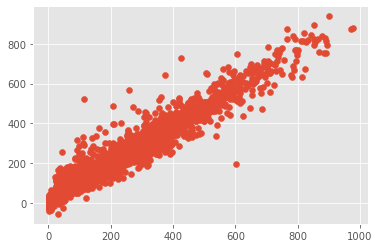

In [170]:
plt.scatter(y_test,tuned_cbr_pred)

In [171]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [172]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_cbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_cbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_cbr_pred)))

MAE: 26.636657786765504
MSE: 1735.8641806289754
RMSE: 41.66370339550933


In [173]:
# Catboost regressor model (before hyperparameter tuning) is at 4th position in models.values() 
list(models.values())[4]

In [174]:
# without hyperparameter tuning 
cbr_prediction=list(models.values())[4].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,cbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, cbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cbr_prediction)))

MAE: 30.120190474682992
MSE: 2103.1189443939993
RMSE: 45.85977479659052


In [110]:
# SO we can see hyperparameter tuning here has reduced the error rate in CatBoost model 
# and accuracy has increased from 93.36 to 94.5 percent

# Hyperparameter Tuning for Bagging Regressor model

In [41]:
BR_parameters = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

In [42]:
# Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our Bagging regressor model.

In [43]:
from sklearn.model_selection import GridSearchCV

br_tuning_model=GridSearchCV(BaggingRegressor(),
                                   param_grid=BR_parameters,cv=3,verbose=1,n_jobs=-1)

In [44]:
from datetime import datetime
br_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            KNeighborsRegressor()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [45]:
# best hyperparameters for bagging regressor
br_tuning_model.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

In [46]:
# training bagging regressor model with best hyperparameters
tuned_br_hyper_model= BaggingRegressor(
    base_estimator= None,
    bootstrap= True,
    bootstrap_features= False,
    max_features=1.0,
    max_samples=1.0,
    n_estimators=100
)

In [47]:
# fitting model
tuned_br_hyper_model.fit(X_train,y_train)

BaggingRegressor(n_estimators=100)

In [48]:
# Check accuracy
print (f'Train Accuracy - : {tuned_br_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_br_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.916


In [49]:
# prediction 

tuned_br_pred=tuned_br_hyper_model.predict(X_test)

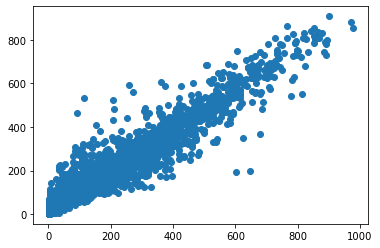

In [50]:
plt.scatter(y_test,tuned_br_pred)

In [51]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [52]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_br_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_br_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_br_pred)))

MAE: 32.038583189489835
MSE: 2645.9258069751713
RMSE: 51.438563422544874


In [53]:
# Bagging regressor (before hyperparameter tuning) is at 8th position in models.values() 
list(models.values())[8]

BaggingRegressor()

In [54]:
# without hyperparameter tuning 
br_prediction=list(models.values())[8].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,br_prediction))
print('MSE:', metrics.mean_squared_error(y_test, br_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, br_prediction)))

MAE: 34.1367088607595
MSE: 3006.0360928909345
RMSE: 54.8273297990239


In [ ]:
# SO we can see hyperparameter tuning here has reduced the error rate in Bagging Regressor Model 
# and accuracy has increased from 90.51 percent to 91.6 

# Hyperparameter Tuning for Decison Tree

In [111]:
DTR_parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
                'splitter':['best','random'],
                'max_depth':[3,5,7,10,15,20,30,50],
                'min_samples_leaf':[3,5,10,15,20,23,25],
                'min_samples_split':[8,10,12,18,20],
                'max_leaf_nodes':[None,10,20,30,40,50,60]                 
               }

In [112]:
# Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our decision tree model.

In [113]:
from sklearn.model_selection import GridSearchCV

dtr_tuning_model=GridSearchCV(DecisionTreeRegressor(),
                                   param_grid=DTR_parameters,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=4)

In [114]:
from datetime import datetime
dtr_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 11760 candidates, totalling 35280 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7, 10, 15, 20, 30, 50],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [3, 5, 10, 15, 20, 23, 25],
                         'min_samples_split': [8, 10, 12, 18, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [116]:
# best hyperparameters for decision tree regressor
dtr_tuning_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 30,
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'splitter': 'random'}

In [123]:
# training decision tree with best hyperparameters
tuned_dtr_hyper_model= DecisionTreeRegressor(
                                         max_depth=30,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=3,
                                         min_samples_split=12,   
                                         splitter='random',
                                         criterion='friedman_mse')

In [124]:
# fitting model
tuned_dtr_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=30,
                      min_samples_leaf=3, min_samples_split=12,
                      splitter='random')

In [125]:
# Check accuracy
print (f'Train Accuracy - : {tuned_dtr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_dtr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.939
Test Accuracy - : 0.877


In [126]:
# prediction 

tuned_dtr_pred=tuned_dtr_hyper_model.predict(X_test)

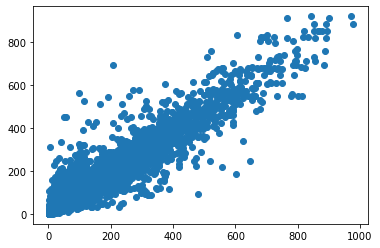

In [127]:
plt.scatter(y_test,tuned_dtr_pred)

In [128]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [129]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_dtr_pred)))

MAE: 37.97488889173884
MSE: 3882.2163011589496
RMSE: 62.30743375520252


In [130]:
# Decision tree regressor (before hyperparameter tuning) is at 1st position in models.values() 
list(models.values())[1]

DecisionTreeRegressor()

In [131]:
# without hyperparameter tuning 
dtr_prediction=list(models.values())[1].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,dtr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, dtr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_prediction)))

MAE: 43.45138089758343
MSE: 5196.015247410817
RMSE: 72.08339092614065


In [132]:
# SO we can see hyperparameter tuning here has reduced the error rate in Decision Tree model 
# and accuracy has increased from 83.59 to 87.7 percent

# Hyperparameter Tuning for Random Forest Regression Model

In [58]:
RF_parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'max_features':['sqrt','log2',None],
               'n_estimators': [8,16,32,64,128,256]
    }

In [62]:
from sklearn.model_selection import GridSearchCV
rf_tuning_model=GridSearchCV(RandomForestRegressor(),
                                   param_grid=RF_parameters,cv=3,verbose=2,n_jobs=-1)

In [63]:
rf_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [8, 16, 32, 64, 128, 256]},
             verbose=2)

In [64]:
# Check Accuracy
print (f'Train Accuracy - : {rf_tuning_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_tuning_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.917


In [65]:
# best hyperparameters for random forest regressor
rf_tuning_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 256}

In [66]:
# training random forest with best hyperparameters
tuned_rf_hyper_model= RandomForestRegressor(
                                         max_features=None,
                                         criterion='friedman_mse',
                                         n_estimators=256)

# fitting model
tuned_rf_hyper_model.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=256)

In [67]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_rf_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_rf_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.917


In [68]:
# prediction 

tuned_rf_pred=tuned_rf_hyper_model.predict(X_test)

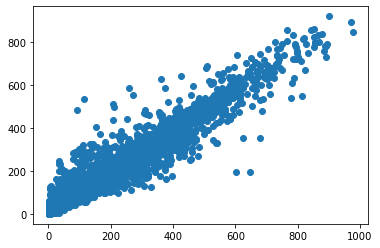

In [69]:
plt.scatter(y_test,tuned_rf_pred)

In [70]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [71]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))

MAE: 31.882341936972573
MSE: 2634.5596497646084
RMSE: 51.32796167552934


In [72]:
# Random forest (before hyperparameter tuning) is at 0th  position in models.values() 
list(models.values())[0]

RandomForestRegressor()

In [73]:
# without hyperparameter tuning 
rf_prediction=list(models.values())[0].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,rf_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

MAE: 32.121873568414706
MSE: 2669.8811707188997
RMSE: 51.67089287712086


In [74]:
# Hyperparameter Tuning to Random Forest improved its accuracy slightly from 91.56 to 91.7

# Hyperparameter Tuning for Gradient Boosting Regression Model

In [55]:
GBR_parameters = {'learning_rate': [0.2,0.02,0.02,1],
                  'max_depth'    : [2,4,6,8,10]
                 }

In [ ]:
# GBR_parameters={
# #     'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
#     'learning_rate':[.1,.01,.05,.001],
#     'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
# #     'criterion':['squared_error', 'friedman_mse'],
# #     'max_features':['auto','sqrt','log2'],
#     'n_estimators': [8,16,32,64,128,256]
    
#     }

In [56]:
# GBR_parameters = {
#     'learning_rate': [0.01,0.02,0.03,0.04],
#     'subsample'    : [0.9, 0.5, 0.2, 0.1],
#     'n_estimators' : [100,500,1000, 1500],
#     'max_depth'    : [4,6,8,10]
#                  }

In [57]:
# GBR_parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
#               'learning_rate' : (0.05,0.25,0.50,1),
#               'criterion' : ['friedman_mse', 'mse', 'mae'],
#               'max_features' : ['auto', 'sqrt', 'log2']
#              }

In [58]:
gbr_tuning_model=GridSearchCV(GradientBoostingRegressor(),
                             param_grid=GBR_parameters,)

In [59]:
gbr_tuning_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.02, 0.02, 1],
                         'max_depth': [2, 4, 6, 8, 10]})

In [60]:
# Checking Accuracy
print(f' Train Accuracy - : {gbr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {gbr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 0.981
 Test Accuracy - : 0.921


In [61]:
# best hyperparameters for Gradient Boosting model
gbr_tuning_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8}

In [62]:
# training this model with best hyperparameters
tuned_gbr_hyper_model= GradientBoostingRegressor(
    learning_rate=0.2, 
    max_depth=8
)

# fitting model
tuned_gbr_hyper_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=8)

In [63]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_gbr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_gbr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.982
Test Accuracy - : 0.921


In [64]:
# prediction 

tuned_gbr_pred=tuned_gbr_hyper_model.predict(X_test)

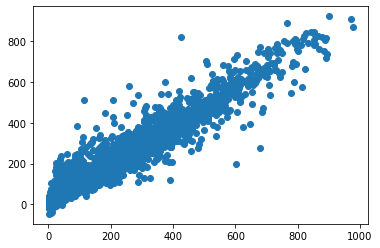

In [65]:
plt.scatter(y_test,tuned_gbr_pred)

In [66]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [67]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_gbr_pred)))

MAE: 31.532465103925848
MSE: 2487.8189820424836
RMSE: 49.878041080644735


In [68]:
# Gradient Boosting Regressor (before hyperparameter tuning) is at 2nd  position in models.values() 
list(models.values())[2]

GradientBoostingRegressor()

In [69]:
# without hyperparameter tuning 
gbr_prediction=list(models.values())[2].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,gbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, gbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_prediction)))

MAE: 57.459353892121605
MSE: 6318.704947773045
RMSE: 79.49028209644904


In [ ]:
# Hyperparameter Tuning to Gradient Boosting Regressor model reduced its error rate significantly
# and improved its accuracy rate highly  from 80.05 to 92.1 percent

# Hyperparameter Tuning for KNeighbors Regressor model

In [70]:
KNR_parameters={'n_neighbors': [2,3,4,5,6], 
                'weights': ['uniform','distance']}

In [71]:
knr_tuning_model=GridSearchCV(KNeighborsRegressor(),
                             param_grid=KNR_parameters,scoring='r2',cv=3)

In [72]:
knr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [73]:
# Checking Accuracy
print(f' Train Accuracy - : {knr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {knr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 1.000
 Test Accuracy - : 0.807


In [74]:
# best hyperparameters for KNeighbors Regressor model
knr_tuning_model.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [75]:
# training this model with best hyperparameters
tuned_knr_hyper_model= KNeighborsRegressor(
    n_neighbors=6,
    weights='distance'
)

# fitting model
tuned_knr_hyper_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [76]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_knr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_knr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.807


In [77]:
# prediction 

tuned_knr_pred=tuned_knr_hyper_model.predict(X_test)

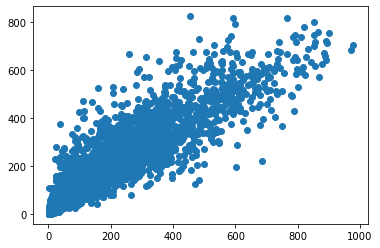

In [78]:
plt.scatter(y_test,tuned_knr_pred)

In [79]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [80]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_knr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_knr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_knr_pred)))

MAE: 50.970942297819754
MSE: 6101.186641396087
RMSE: 78.11009308275139


In [81]:
# Kneighbors model (before hyperparameter tuning) is at 2nd  position in models.values() 
list(models.values())[6]

KNeighborsRegressor()

In [82]:
# without hyperparameter tuning 
knr_prediction=list(models.values())[6].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,knr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, knr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_prediction)))

MAE: 55.925143843498276
MSE: 7062.721208285386
RMSE: 84.03999766947513


In [ ]:
# Hyperparameter Tuning to K Nearest Neighbors model reduced its error rate and
# improved its accuracy slightly from 77.70 to 80.7

# Hyperparameter Tuning for Support Vector Regressor model

In [47]:
SVR_parameters={
    'C': [0.1,1,10,100],
    'gamma': [0.01,0.1,1,10],
    'kernel': ['linear']
}

In [48]:
svr_tuning_model=GridSearchCV(SVR(),
                             param_grid=SVR_parameters,cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [49]:
svr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [50]:
# Checking Accuracy
print(f' Train Accuracy - : {svr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {svr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : -11227.455
 Test Accuracy - : -11011.137


In [51]:
# best hyperparameters for Linear Regressor model
svr_tuning_model.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}

In [52]:
# training this model with best hyperparameters
tuned_svr_hyper_model= SVR(
    C=100, 
    gamma=0.01, 
    kernel='linear'
)

# fitting model
tuned_svr_hyper_model.fit(X_train,y_train)

SVR(C=100, gamma=0.01, kernel='linear')

In [53]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_svr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_svr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.662
Test Accuracy - : 0.652


In [54]:
# prediction 

tuned_svr_pred=tuned_svr_hyper_model.predict(X_test)

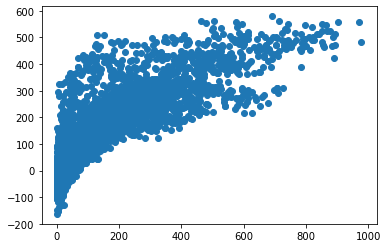

In [55]:
plt.scatter(y_test,tuned_svr_pred)

In [56]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [57]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_svr_pred)))

MAE: 70.89301628585778
MSE: 11011.137032495888
RMSE: 104.93396510423061


In [58]:
# Support Vector Regressor model (before hyperparameter tuning) is at 7th  position in models.values() 
list(models.values())[7]

SVR()

In [59]:
# without hyperparameter tuning 
svr_prediction=list(models.values())[7].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,svr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, svr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_prediction)))

MAE: 84.84323816159855
MSE: 17882.4550634632
RMSE: 133.7252970214058


In [60]:
# Hyperparameter Tuning to Support Vector model has reduced its error slightly 
# and improved its accuracy from 43.53 percent to 65.2 percent

# Hyperparameter Tuning for Adaboost Regressor model

In [61]:
ABR_parameters={
    'learning_rate':[.1,.01,0.5,.001],
    # 'loss':['linear','square','exponential'],
    'n_estimators': [8,16,32,64,128,256]
}

In [62]:
abr_tuning_model=GridSearchCV(AdaBoostRegressor(),
                             param_grid=ABR_parameters,cv=3,n_jobs=-1)

In [63]:
abr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 0.001],
                         'n_estimators': [8, 16, 32, 64, 128, 256]})

In [64]:
# Checking Accuracy
print(f' Train Accuracy - : {abr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {abr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 0.451
 Test Accuracy - : 0.437


In [65]:
# best hyperparameters for Adaboost Regressor model
abr_tuning_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 128}

In [66]:
# training this model with best hyperparameters
tuned_abr_hyper_model= AdaBoostRegressor(learning_rate=0.1,n_estimators=128)

# fitting model
tuned_abr_hyper_model.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=128)

In [67]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_abr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_abr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.444
Test Accuracy - : 0.426


In [68]:
# prediction 

tuned_abr_pred=tuned_abr_hyper_model.predict(X_test)

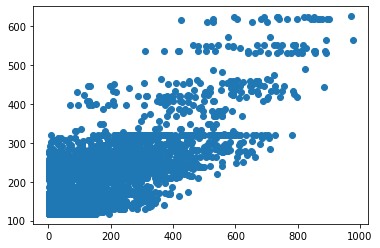

In [69]:
plt.scatter(y_test,tuned_abr_pred)

In [70]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [71]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_abr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_abr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_abr_pred)))

MAE: 111.7414801825155
MSE: 18163.41520934923
RMSE: 134.77171516809167


In [72]:
# Adaboost Regressor model (before hyperparameter tuning) is at 5th  position in models.values() 
list(models.values())[5]

AdaBoostRegressor()

In [73]:
# without hyperparameter tuning 
abr_prediction=list(models.values())[5].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,abr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, abr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, abr_prediction)))

MAE: 121.57949115887712
MSE: 20175.60202678269
RMSE: 142.04084633225293


In [ ]:
# Hyperparameter Tuning to Adaboost Regressor model slightly reduced its error 
# and improved its accuracy slightly from 36.29 percent to 42.6 percent

# SO overall the best performing model that we got even after Hyperparameter tuning is CatBoost Regressor model with accuracy rate of 94.5 %